In [1]:
import sys
sys.path.append('../../')
import helper

import numpy as np
from pandas import read_excel, DataFrame, pivot_table
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [2]:
origin = read_excel("https://data.hossam.kr/F03/wine_3type.xlsx")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  kind 

In [3]:
origin.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
kind                            0
dtype: int64

In [4]:
origin.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
origin['kind']

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: kind, Length: 178, dtype: object

In [6]:
origin['kind'] = origin['kind'].astype('category').cat.rename_categories({'class_0': 0, 'class_1': 1, 'class_2': 2})
origin['kind'].value_counts()

kind
1    71
0    59
2    48
Name: count, dtype: int64

In [7]:
origin.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


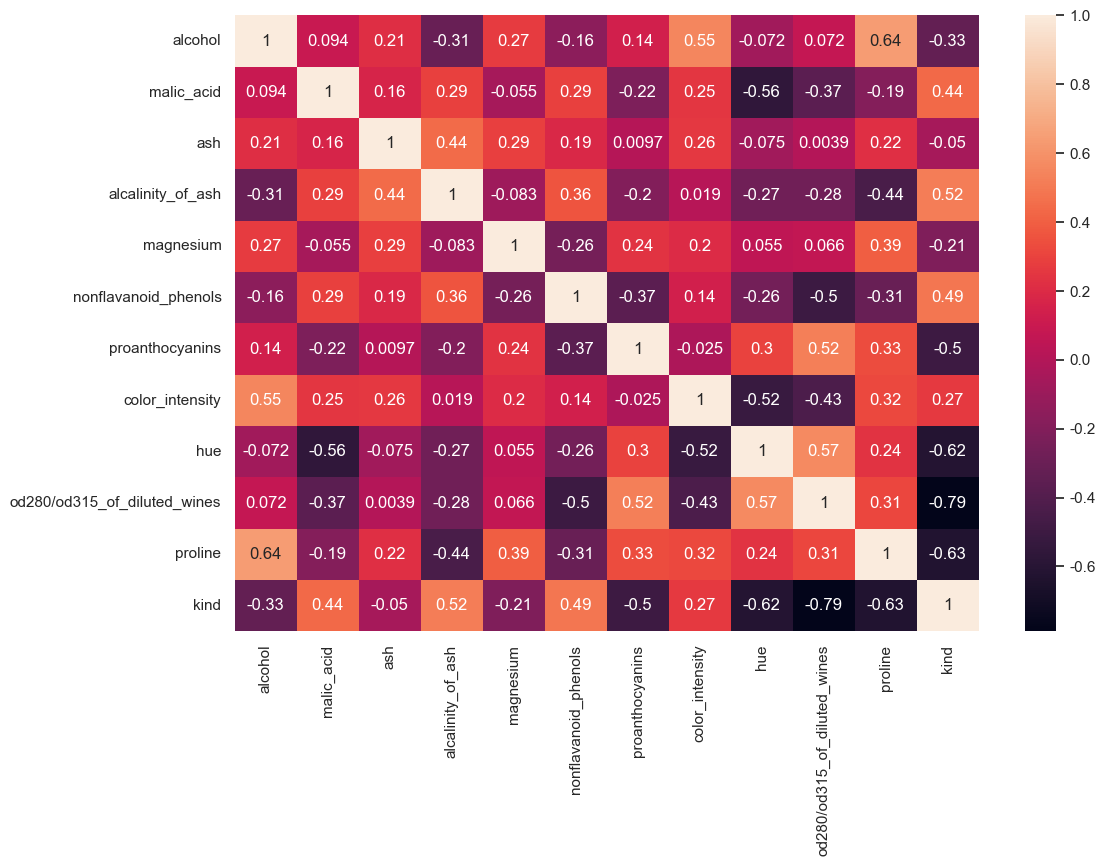

In [8]:
df = origin.copy()
df = origin.drop(['total_phenols', 'flavanoids'], axis=1)
plt.figure(figsize=(12,8))
sb.set(font_scale=1.0)
sb.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

In [9]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'kind'],
      dtype='object')

In [14]:
x = df[['proline','od280/od315_of_diluted_wines','hue', 'proanthocyanins', 'nonflavanoid_phenols', 'alcalinity_of_ash', 'malic_acid']]
y = df['kind']
x.shape, y.shape

((178, 7), (178,))

In [15]:
from sklearn.preprocessing import StandardScaler
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)
print(x_scale.shape)
x_scale

(178, 7)


array([[ 1.01300893,  1.84791957,  0.36217728, ..., -0.65956311,
        -1.16959318, -0.5622498 ],
       [ 0.96524152,  1.1134493 ,  0.40605066, ..., -0.82071924,
        -2.49084714, -0.49941338],
       [ 1.39514818,  0.78858745,  0.31830389, ..., -0.49840699,
        -0.2687382 ,  0.02123125],
       ...,
       [ 0.28057537, -1.48544548, -1.61212515, ...,  0.5491078 ,
         0.15166079,  1.74474449],
       [ 0.29649784, -1.40069891, -1.56825176, ...,  1.3548884 ,
         0.15166079,  0.22769377],
       [-0.59516041, -1.42894777, -1.52437837, ...,  1.59662258,
         1.50294326,  1.58316512]])

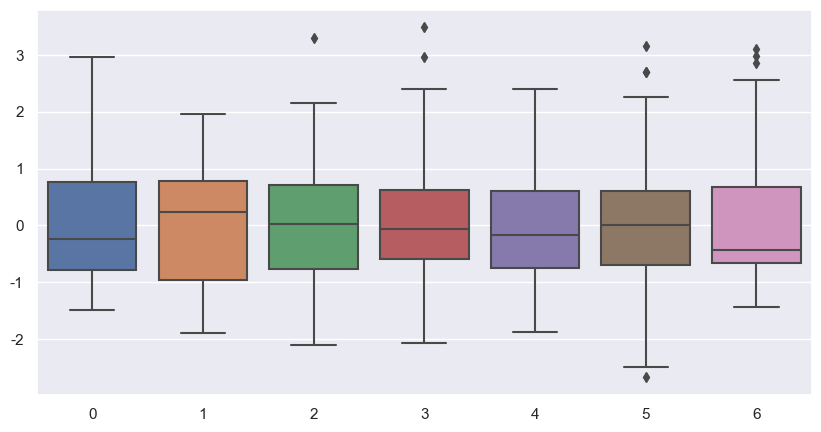

In [18]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=x_scale)
plt.show()
plt.close()

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: kind, Length: 178, dtype: category
Categories (3, int64): [0, 1, 2]

In [19]:
y_cate = to_categorical(y)
y_cate

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y_cate, test_size=0.3, random_state=777)
print("훈련용 데이터셋 크기: %s, 훈련용 레이블셋 크기: %s" % (x_train.shape, y_train.shape))
print("검증용 데이터셋 크기: %s, 검증용 레이블셋 크기: %s" % (x_test.shape, y_test.shape))

훈련용 데이터셋 크기: (124, 7), 훈련용 레이블셋 크기: (124, 3)
검증용 데이터셋 크기: (54, 7), 검증용 레이블셋 크기: (54, 3)


In [21]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(7,)))
model.add(Dense(3, activation='softmax')) # 종속변수가 3개
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500
4/4 [==============================] - 1s 59ms/step - loss: 66.7477 - acc: 0.2581 - val_loss: 46.0227 - val_acc: 0.3148 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 34.5545 - acc: 0.4355 - val_loss: 28.5051 - val_acc: 0.3148 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 13.5586 - acc: 0.4355 - val_loss: 3.4293 - val_acc: 0.3889 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 8.7434 - acc: 0.3065 - val_loss: 10.6484 - val_acc: 0.3889 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 11.5027 - acc: 0.3065 - val_loss: 7.1123 - val_acc: 0.2963 - lr: 0.0010
Epoch 6/500
1/4 [======>.......................] - ETA: 0s - loss: 9.0365 - acc: 0.3438
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
4/4 [==============================] - 0s 11ms/step - loss: 9.6878 - acc: 0.2581 - val_loss: 4.0697 - val_acc: 0.6

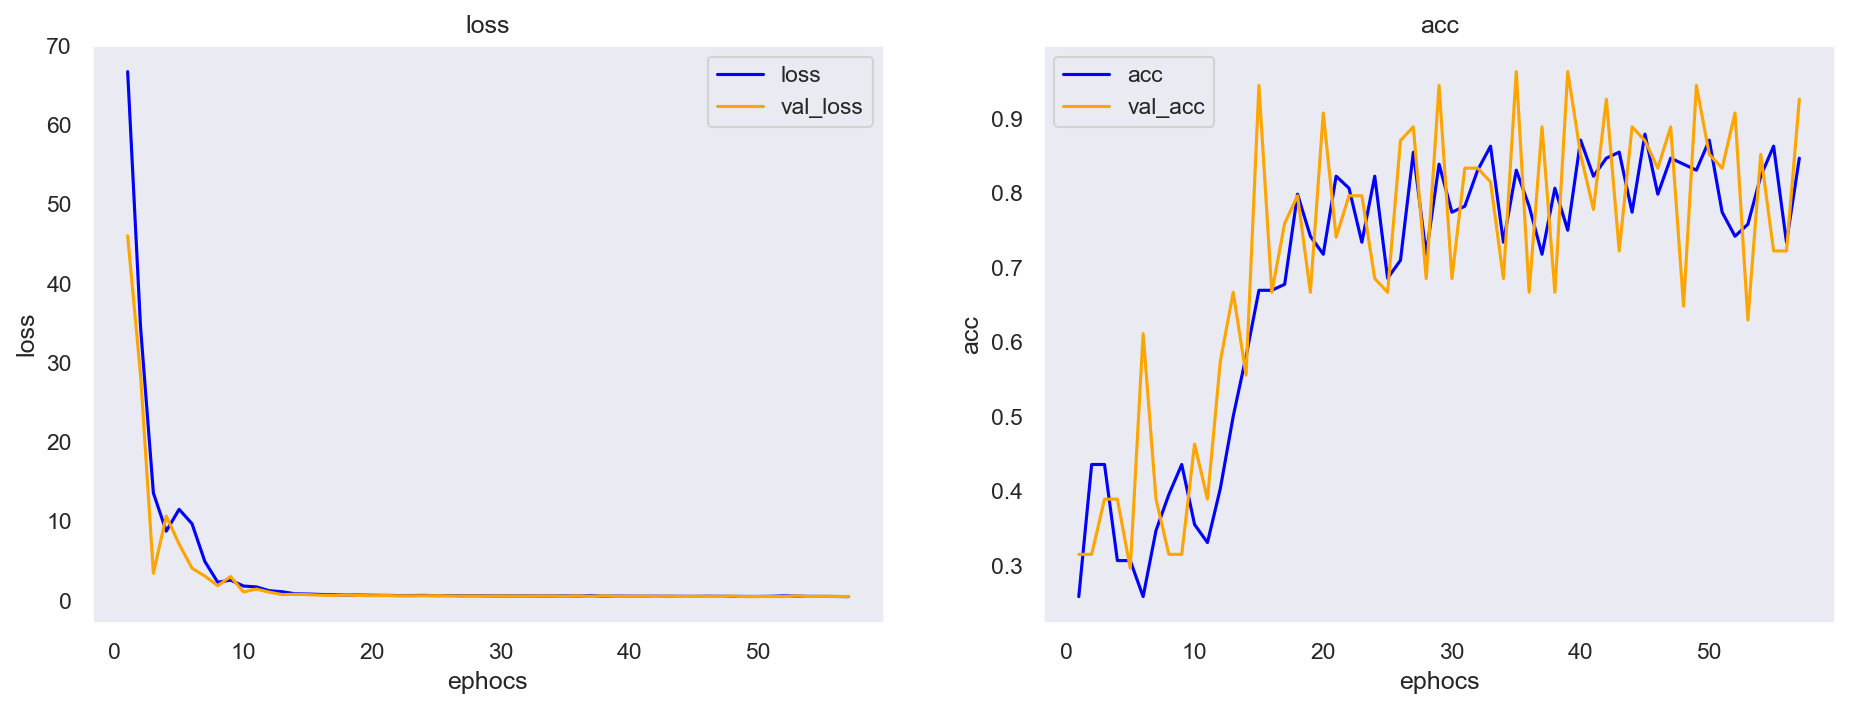

4/4 [==============================] - 0s 1ms/step - loss: 0.5015 - acc: 0.9113
최종 훈련 손실률: 0.501513, 최종 훈련 정확도: 0.911290
2/2 [==============================] - 0s 3ms/step - loss: 0.4994 - acc: 0.9259
최종 검증 손실률: 0.499367, 최종 검증 정확도: 0.925926


In [23]:
helper.tf_result_plot(result)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))

In [24]:
results = model.predict(x_test)
data_count, case_count = results.shape
print("%d개의 검증 데이터가 각각 %d개의 경우의 수를 갖는다." % (data_count, case_count))

print(results)

2/2 [==============================] - 0s 2ms/step
54개의 검증 데이터가 각각 3개의 경우의 수를 갖는다.
[[0.8690235  0.03295911 0.09801748]
 [0.05978323 0.5057797  0.4344371 ]
 [0.06313131 0.32921213 0.6076565 ]
 [0.06441406 0.5011898  0.43439603]
 [0.98637354 0.00123378 0.01239267]
 [0.72192246 0.12258685 0.15549071]
 [0.01469587 0.6312692  0.354035  ]
 [0.89037687 0.02186227 0.08776096]
 [0.00911103 0.7136249  0.27726415]
 [0.03309863 0.43886146 0.5280399 ]
 [0.07485219 0.24348839 0.68165946]
 [0.2342979  0.14383832 0.6218638 ]
 [0.93075424 0.01357025 0.05567546]
 [0.01840563 0.69205534 0.28953898]
 [0.03859859 0.31594008 0.6454613 ]
 [0.01390675 0.41786116 0.56823206]
 [0.21138626 0.20208049 0.5865332 ]
 [0.42756918 0.2582883  0.31414247]
 [0.05248827 0.5000584  0.44745335]
 [0.11982036 0.53954375 0.340636  ]
 [0.06259808 0.5770868  0.36031502]
 [0.01182454 0.78790975 0.20026569]
 [0.00831028 0.6887839  0.30290583]
 [0.01286727 0.6547729  0.33235988]
 [0.28689224 0.334929   0.37817878]
 [0.733      0.06

In [25]:
arg_results = np.argmax(results, axis=-1)
arg_results

array([0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int64)

In [26]:
result_df = DataFrame({
    '실제값': np.argmax(y_test, axis = -1),
    '분류결과': arg_results
})

result_df

,실제값,분류결과
0,0,0
1,0,1
2,2,2
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,2,2
